# Intro to Data Science @ SzISz Part V.
## Classification and Regression

### Table of contents
- Classification
    - <a href="#What-is-Classification?">Classification Theory</a>
    - <a href="#Linear-models">Linear models</a>
    - <a href="#Decision-Trees">Decision Trees</a>
    - <a href="#Neural-Networks">Neural Networks</a>
    - <a href="#Support-Vector-Machines">Support Vector Machines</a>
    - <a href="#Nearest-Neighbours">Nearest Neighbours</a>
- Regression
    - <a href="#What-is-Regression?">Regression Theory</a>
    - <a href="#Linear-regression">Linear regression</a>
    - <a href="#Ridge-regression">Ridge regression</a>
    - <a href="#Bayesian-Ridge-regression">Bayesian regression</a>
    - <a href="#Support-Vector-regression">Support Vector regression</a>
    - <a href="#XGBoost">XGBoost</a>
    

## What is Classification?
_"Classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, on the basis of a training set of data containing observations (or instances) whose category membership is known."_ from: <a href="https://en.wikipedia.org/w/index.php?title=Classification_in_machine_learning">Wiki</a>

Classification is a <a href="http://scikit-learn.org/stable/supervised_learning.html">supervised machine learning</a> problem. The observed item's properties are called __feature__s, the categorical feature is referenced as the __label__, and the algorithm which implements the classification is the __classifier__. 

## Why is it important?
It is one of the main problems in Data Science; it's application ranges from detecting if a mail is <a href="https://www.youtube.com/watch?v=cFrtpT1mKy8">spam</a> or not (ham), to the self driving car's pedestrian detection. It can be applied to many fields, including:
- computer vision
- medical analysis
- speech recognition
- biometric identification
- document classification
- pattern recognition
- etc.

## Tools
- Linear models
    - Logistic regression
    - Naive Bayes classifier
    - Perceptron
- Support Vector Machines
- Neural Networks
- Instance-based learning
    - k-Nearest Neighbours
- Decision trees
    - Random forests
- Ensemble methods
- etc.

In [1]:
%matplotlib inline
import numpy as np
import scipy.sparse as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split

In [2]:
iris = load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Baseline model

In [3]:
from sklearn.dummy import DummyClassifier

In [4]:
dummy = DummyClassifier(random_state=42)
dummy.fit(X, y)

DummyClassifier(constant=None, random_state=42, strategy='stratified')

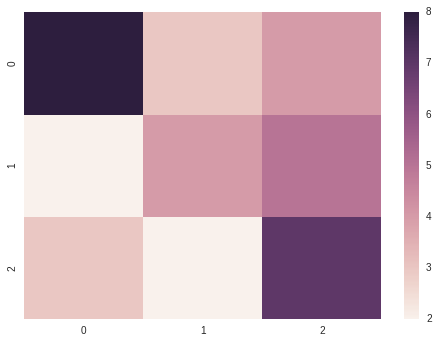

In [5]:
y_dummy = dummy.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_dummy))

In [6]:
dummy.score(X_test, y_test)

0.5

## Linear models
### Logistic regression

In [7]:
from sklearn.linear_model import LogisticRegression

In [15]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
clf.coef_, clf.intercept_

(array([[ 0.37849553,  1.36818142, -2.12498513, -0.94636238],
        [ 0.45303284, -1.54734544,  0.42143807, -1.05957567],
        [-1.55311803, -1.51513641,  2.36637374,  2.1109316 ]]),
 array([ 0.23912346,  0.96186811, -1.02227141]))

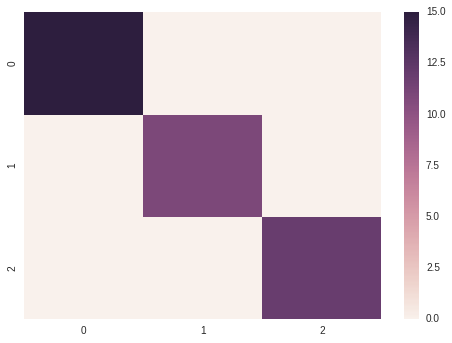

In [9]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [10]:
clf.score(X_test, y_test)

1.0

### Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

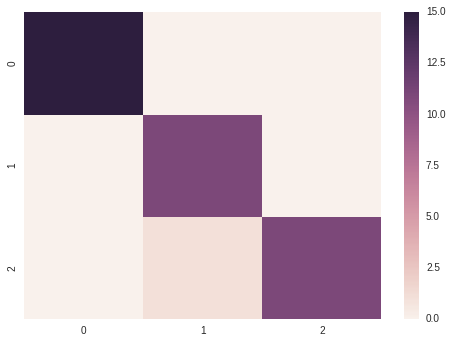

In [13]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [14]:
clf.score(X_test, y_test)

0.97368421052631582

### Perceptron

In [17]:
from sklearn.linear_model import Perceptron

In [18]:
clf = Perceptron(verbose=0, random_state=42)
clf.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=42, shuffle=True,
      verbose=0, warm_start=False)

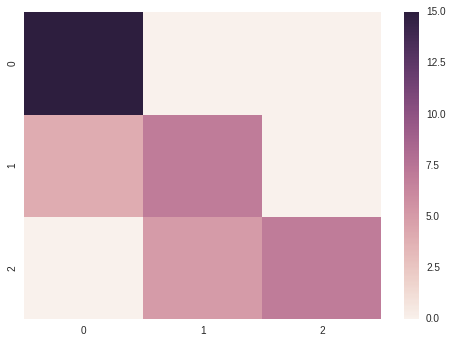

In [19]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [20]:
clf.score(X_test, y_test)

0.76315789473684215

## Decision Trees

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

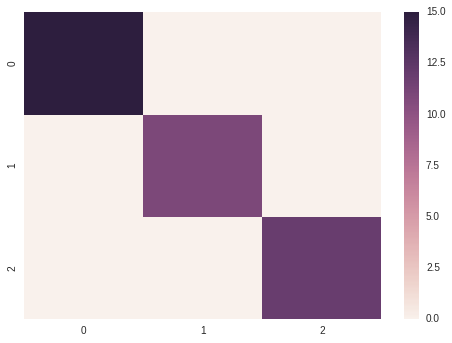

In [23]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [24]:
clf.score(X_test, y_test)

1.0

## Neural Networks

In [25]:
XOR_X, XOR_y = np.array([[0,0], [0, 1], [1, 0], [1, 1]]), np.array([0, 1, 1, 0])

In [26]:
perceptron = Perceptron(verbose=2, random_state=42)
perceptron.fit(XOR_X, XOR_y)

-- Epoch 1
Norm: 1.41, NNZs: 2, Bias: 1.000000, T: 4, Avg. loss: 0.250000
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.00, NNZs: 0, Bias: -1.000000, T: 8, Avg. loss: 0.500000
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 1.41, NNZs: 2, Bias: 1.000000, T: 12, Avg. loss: 0.416667
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.00, NNZs: 0, Bias: -1.000000, T: 16, Avg. loss: 0.500000
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.41, NNZs: 2, Bias: 1.000000, T: 20, Avg. loss: 0.450000
Total training time: 0.00 seconds.


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      n_iter=5, n_jobs=1, penalty=None, random_state=42, shuffle=True,
      verbose=2, warm_start=False)

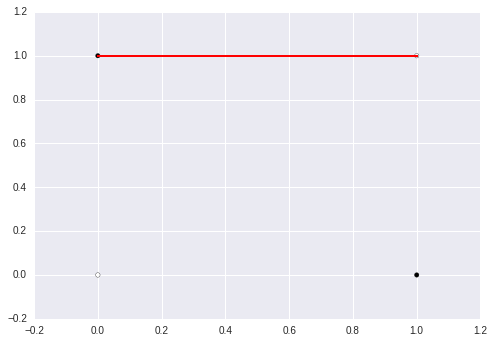

In [27]:
plt.scatter(XOR_X[:, 0], XOR_X[:, 1], c=XOR_y)
plt.plot(XOR_X, perceptron.predict(XOR_X), 'r-')

In [28]:
conf_mat = confusion_matrix(XOR_y, perceptron.predict(XOR_X))
conf_mat

array([[0, 2],
       [0, 2]])

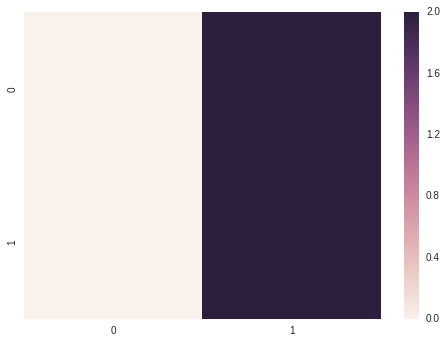

In [29]:
sns.heatmap(conf_mat)

In [30]:
try:
    from sklearn.neural_network import MLPClassifier
except:
    print "Maybe in 0.18. http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html"

Maybe in 0.18. http://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html


## Homework:
try this @ home: https://github.com/jorgenkg/python-neural-network

## Support Vector Machines

In [7]:
from sklearn.svm import SVC

In [8]:
clf = SVC(random_state=42)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False)

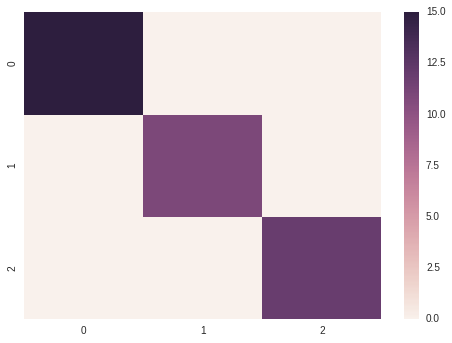

In [9]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [11]:
clf.score(X_test, y_test)

1.0

## Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

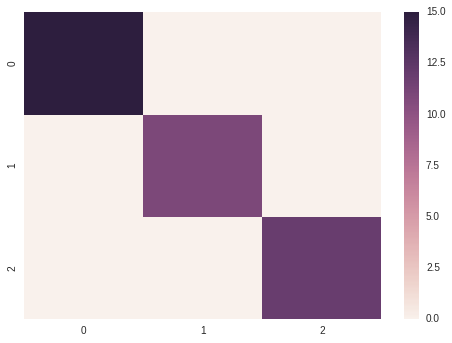

In [14]:
y_hat = clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, y_hat))

In [15]:
clf.score(X_test, y_test)

1.0

---

## What is Regression?
Regression - just as classification - is a supervised machine learning problem however in case of regression the target variable is continuous. It is also _"a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a __dependent variable__ and one or more __independent variable__s (or 'predictors')."_ from: <a href="https://en.wikipedia.org/wiki/Regression_analysis">Wiki</a>

It is important to note that instead of the descriptive nature of statistical regression analysis Data Science focuses on the predictive side of this method.

## Why is it important?
_"Regression analysis is widely used for prediction and forecasting, where its use has substantial overlap with the field of machine learning."_ from: <a href="https://en.wikipedia.org/wiki/Regression_analysis">Wiki</a>

It is used to forecast any continuous variable:
- stock market
- salary prediction
- network traffic
- traffic
- etc.

## Tools
- Linear regression
- Ridge regression
- LASSO
- Bayesian regression
- Support Vector regression
- etc.

In [3]:
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
def plot_pred(y, predicted):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted)
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

In [5]:
boston = load_boston()
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

## Linear regression

In [19]:
from sklearn.linear_model import LinearRegression

In [29]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [30]:
mean_squared_error(y_test, y_hat), reg.score(X_test, y_test)

(22.131677894303223, 0.68395572431793383)

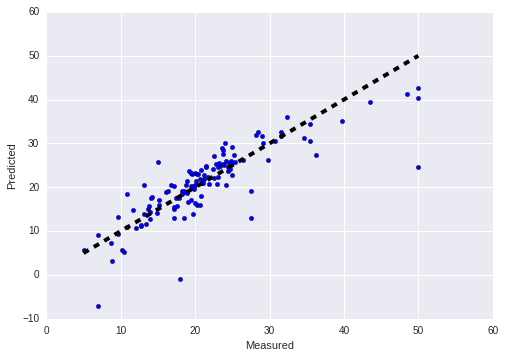

In [31]:
plot_pred(y_test, y_hat)

## Ridge regression

In [32]:
from sklearn.linear_model import Ridge

In [49]:
reg = Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [50]:
mean_squared_error(y_test, y_hat), reg.score(X_test, y_test)

(22.344910025855917, 0.68091073175611538)

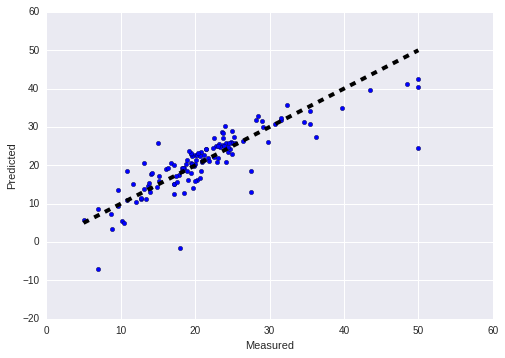

In [51]:
plot_pred(y_test, y_hat)

## Bayesian Ridge regression

In [54]:
from sklearn.linear_model import BayesianRidge

In [55]:
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [56]:
mean_squared_error(y_test, y_hat), reg.score(X_test, y_test)

(22.965781532128812, 0.67204457680714258)

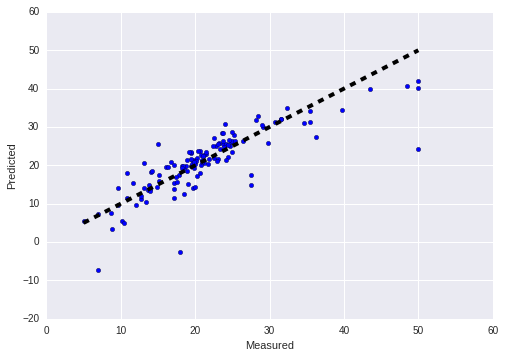

In [57]:
plot_pred(y_test, y_hat)

## Support Vector regression

In [7]:
from sklearn.svm import SVR

In [8]:
reg = SVR(kernel='rbf', gamma=5e-5, C=1e3)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [9]:
mean_squared_error(y_test, y_hat), reg.score(X_test, y_test)

(15.560551191044141, 0.77779257614927055)

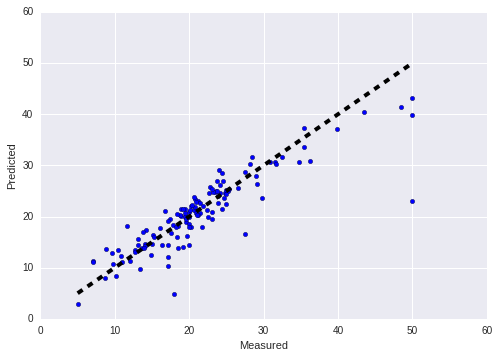

In [10]:
plot_pred(y_test, y_hat)

## XGBoost

In [11]:
try:
    from xgboost.sklearn import XGBRegressor
except ImportError:
    !pip install xgboost
    from xgboost.sklearn import XGBRegressor

In [12]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [13]:
mean_squared_error(y_test, y_hat), reg.score(X_test, y_test)

(10.249252965711444, 0.8536388544374971)

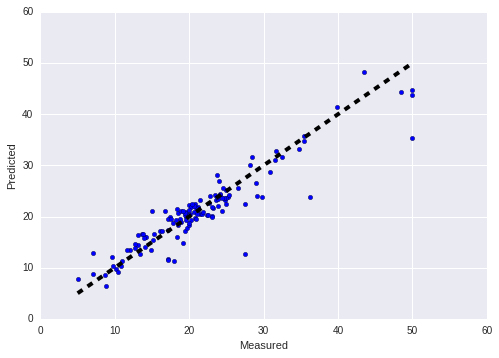

In [14]:
plot_pred(y_test, y_hat)

## Kaggle

In [5]:
import pandas as pd
import pandas_profiling

In [7]:
data = pd.read_csv('../../data/kaggle_job/Train_rev1.csv', encoding='UTF-8')

In [11]:
data.columns

Index([u'Id', u'Title', u'FullDescription', u'LocationRaw',
       u'LocationNormalized', u'ContractType', u'ContractTime', u'Company',
       u'Category', u'SalaryRaw', u'SalaryNormalized', u'SourceName'],
      dtype='object')

In [10]:
data.head()

,Id,Title,FullDescription,LocationRaw,LocationNormalized,ContractType,ContractTime,Company,Category,SalaryRaw,SalaryNormalized,SourceName
0,12612628,Engineering Systems Analyst,Engineering Systems Analyst Dorking Surrey Sal...,"Dorking, Surrey, Surrey",Dorking,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk
1,12612830,Stress Engineer Glasgow,Stress Engineer Glasgow Salary **** to **** We...,"Glasgow, Scotland, Scotland",Glasgow,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 35000/annum 25-35K,30000,cv-library.co.uk
2,12612844,Modelling and simulation analyst,Mathematical Modeller / Simulation Analyst / O...,"Hampshire, South East, South East",Hampshire,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 40000/annum 20-40K,30000,cv-library.co.uk
3,12613049,Engineering Systems Analyst / Mathematical Mod...,Engineering Systems Analyst / Mathematical Mod...,"Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,25000 - 30000/annum 25K-30K negotiable,27500,cv-library.co.uk
4,12613647,"Pioneer, Miser Engineering Systems Analyst","Pioneer, Miser Engineering Systems Analyst Do...","Surrey, South East, South East",Surrey,NaN,permanent,Gregory Martin International,Engineering Jobs,20000 - 30000/annum 20-30K,25000,cv-library.co.uk


In [12]:
pandas_profiling.ProfileReport(data[[u'Id', u'Title',
       u'LocationNormalized', u'ContractType', u'ContractTime', u'Company',
       u'Category', u'SalaryNormalized', u'SourceName']])

Number of variables,9
Number of observations,244768
Total Missing (%),12.5%
Total size in memory,16.8 MiB
Average record size in memory,72.0 B
Numeric,2
Categorical,7
Date,0
Text (Unique),0
Rejected,0
Distinct count,29
